In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

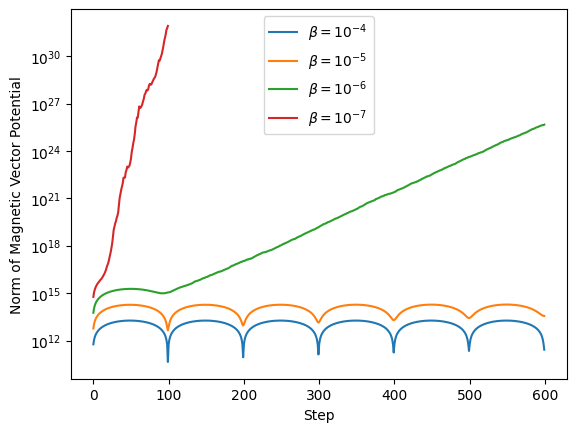

In [3]:
fig, ax = plt.subplots()

for v in range(4, 8):
    df = pd.read_csv(f"results/beta_{10**-v:.0e}.csv")
    ax.plot(df["step"], df["norm"], label=fr"$\beta = 10^{{-{v}}} $ ")

ax.set_yscale('log')
ax.set_xlabel("Step")
ax.set_ylabel("Norm of Magnetic Vector Potential")
ax.legend()
fig.savefig("results/compare_beta.pdf", bbox_inches='tight', dpi=200)


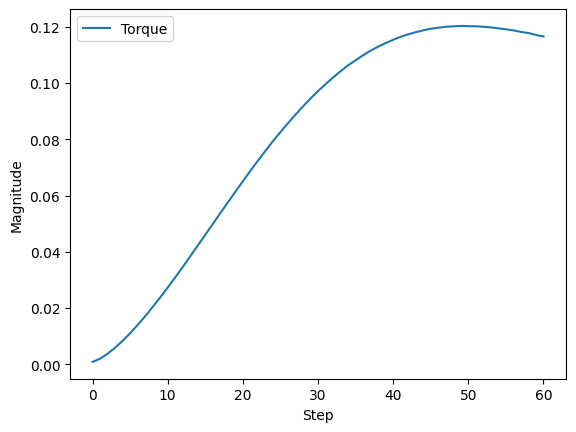

In [4]:
fig, ax = plt.subplots()

df = pd.read_csv(f"results/torque_beta_1.csv")
# ax.plot(df["step"], df["norm_A"], label=fr"Norm of A, $\beta = 10^{{-4}}$")
ax.plot(df["step"], df["torque"], label=f"Torque")

# ax.set_yscale('log')
ax.set_xlabel("Step")
ax.set_ylabel("Magnitude")
ax.legend()
fig.savefig("results/torque.pdf", bbox_inches='tight', dpi=200)

In [5]:
a = 3.8259 / 0.072
print(a, 1/a)

53.1375 0.018819101387908727


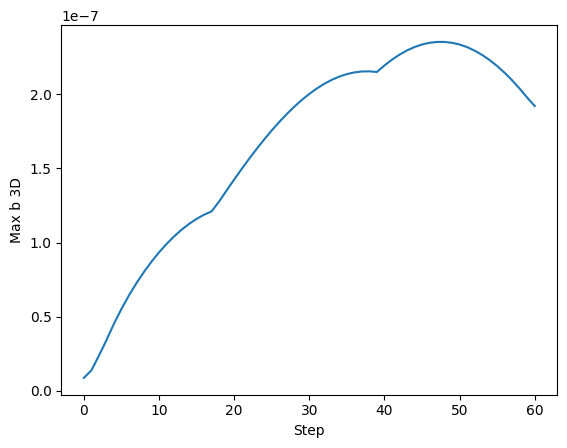

In [6]:
fig, ax = plt.subplots()

df = pd.read_csv(f"results/torque_beta_1.csv")
ax.plot(df["step"], df["max_b"])

# ax.set_yscale('log')
ax.set_xlabel("Step")
ax.set_ylabel("Max b 3D")
# ax.legend()
fig.savefig("results/max_b_3d.pdf", bbox_inches='tight', dpi=200)

In [7]:
from mpltools import annotation

[  1.14033936 -13.34180164]


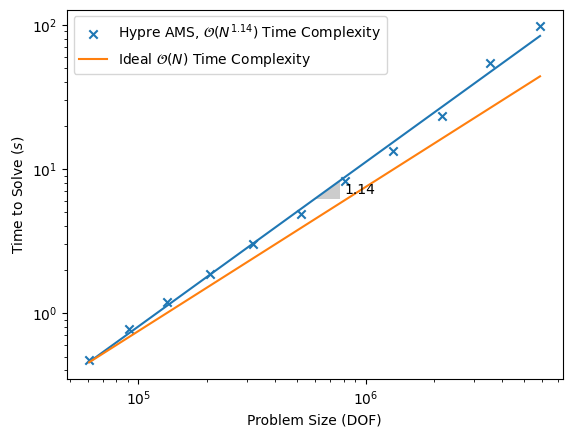

In [33]:
df = pd.read_csv("results/3D copy.csv")

fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("Time to Solve ($s$)")
ax.set_xlabel("Problem Size (DOF)")

fits = []
grads = []

x = np.geomspace(np.array(df['ndofs'])[0], np.array(df['ndofs'])[-1], 10**3)
y = lambda x, f: (x**f[0])*(np.exp(f[1]))

pos = [0, 0]

ltime= np.log(np.array(df['solve_time']))
ldof = np.log(np.array(df['ndofs']))
out = np.polyfit(ldof, ltime, 1, full=True)
r = out[1]
fits.append(out[0])
grads.append(np.round(fits[-1][0], 3))

x1 = x[len(x)//2] + pos[0]
y1 = y(x1, fits[0])     
annotation.slope_marker((x1, y1), grads[0])
ax.scatter(df['ndofs'], df['solve_time'], marker='x', label="Hypre AMS, $\mathcal{O}(N^{1.14})$ Time Complexity")
print(fits[0])
for i, f in enumerate(fits):
    ax.plot(x, y(x, f))

ax.plot(x, y(x, (1, -11.8)), label="Ideal $\mathcal{O}(N)$ Time Complexity")

plt.legend()
fig.savefig("results/time_3D.pdf", dpi=200, bbox_inches="tight")
plt.show()

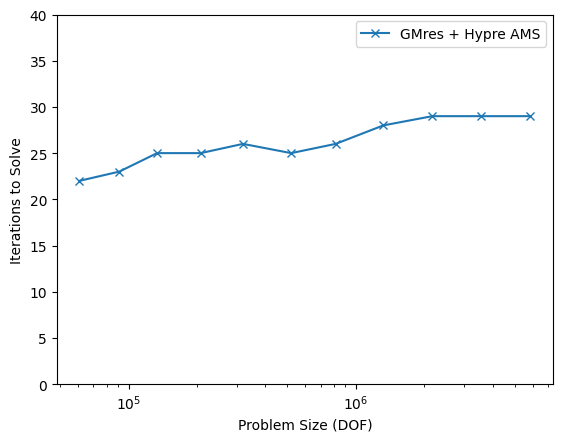

In [9]:
df = pd.read_csv("results/3D copy.csv")

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_ylabel("Iterations to Solve")
ax.set_xlabel("Problem Size (DOF)")
ax.set_ylim(0, 40)
# ax.set_xlim(10**4.5, 10**7)
ax.plot(df['ndofs'], df['iterations'], marker='x', label="GMres + Hypre AMS")


plt.legend()
fig.savefig("results/its_3D.pdf", dpi=200, bbox_inches="tight")
plt.show()